In [3]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [5]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [7]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

2023-09-05 14:10:58.581167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-05 14:10:58.581873: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2023-09-05 14:13:42.586677: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-05 14:13:43.059030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:13:43.312976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:13:44.977475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5365

2023-09-05 14:13:57.666293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:13:57.712165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 17s 43ms/step - loss: 0.6925 - accuracy: 0.5365 - val_loss: 0.6919 - val_accuracy: 0.5530
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6904 - accuracy: 0.5943 - val_loss: 0.6890 - val_accuracy: 0.6034
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6849 - accuracy: 0.6400 - val_loss: 0.6806 - val_accuracy: 0.6388
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6581 - accuracy: 0.6748 - val_loss: 0.6282 - val_accuracy: 0.7050
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6004 - accuracy: 0.7304 - val_loss: 0.5910 - val_accuracy: 0.7254
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5741 - accuracy: 0.7407 - val_loss: 0.5673 - val_accuracy: 0.7386
Epoch 7/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5511 - accuracy: 0.7530 - val_loss: 0.5455 - val_accuracy: 0.75

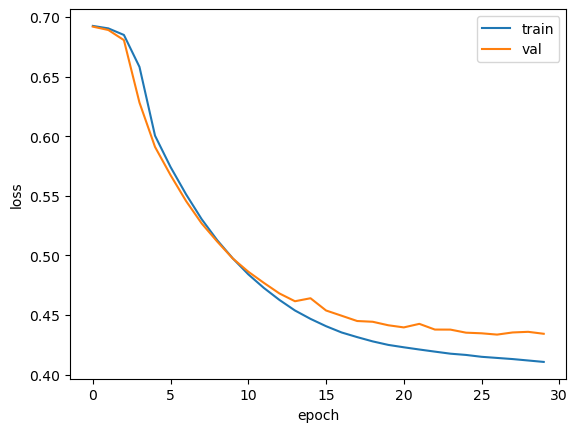

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
         

In [12]:
### 순환 층에 드롭아웃 적용하기

In [13]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history =model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2023-09-05 14:19:57.583069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:19:57.784862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:19:58.056864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.5333

2023-09-05 14:20:09.930895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:20:09.984669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 15s 43ms/step - loss: 0.6923 - accuracy: 0.5333 - val_loss: 0.6913 - val_accuracy: 0.5810
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6900 - accuracy: 0.5922 - val_loss: 0.6884 - val_accuracy: 0.6172
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6857 - accuracy: 0.6251 - val_loss: 0.6830 - val_accuracy: 0.6260
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6758 - accuracy: 0.6320 - val_loss: 0.6676 - val_accuracy: 0.6160
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6420 - accuracy: 0.6683 - val_loss: 0.6237 - val_accuracy: 0.7022
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6070 - accuracy: 0.7278 - val_loss: 0.6000 - val_accuracy: 0.7300
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5872 - accuracy: 0.7405 - val_loss: 0.5823 - val_accuracy: 0.74

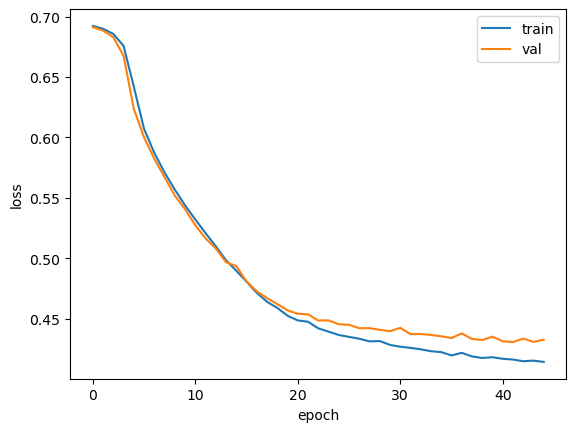

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
### 2개의 층을 연결하기

In [19]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2023-09-05 14:34:19.499562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:34:19.742861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:34:19.986805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:34:20.386026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:34:20.778618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5551

2023-09-05 14:34:41.637722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:34:41.708560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-05 14:34:41.916496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 26s 75ms/step - loss: 0.6921 - accuracy: 0.5551 - val_loss: 0.6908 - val_accuracy: 0.6028
Epoch 2/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6874 - accuracy: 0.6163 - val_loss: 0.6818 - val_accuracy: 0.6448
Epoch 3/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6634 - accuracy: 0.6589 - val_loss: 0.6321 - val_accuracy: 0.6836
Epoch 4/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5869 - accuracy: 0.7085 - val_loss: 0.5621 - val_accuracy: 0.7184
Epoch 5/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5462 - accuracy: 0.7329 - val_loss: 0.5293 - val_accuracy: 0.7456
Epoch 6/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5225 - accuracy: 0.7498 - val_loss: 0.5126 - val_accuracy: 0.7554
Epoch 7/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5053 - accuracy: 0.7609 - val_loss: 0.4983 - val_accuracy: 0.76

In [ ]:
plt.plot(history.histpry['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
### GRU 신경망 훈련하기

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     valildation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
### 마무리

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

In [ ]:
EarlyStopping